# 타이타닉호 생존율 분석하기
- # 데이터 수집

In [1]:
import seaborn as sns
import pandas as pd
titanic = sns.load_dataset("titanic")
titanic.to_csv('data/titanic.csv', index = False)

- # 데이터 준비
- 저장한 titanic.csv 파일을 열어서 데이터 정리 작업이 필요한지 확인

In [6]:
print(titanic[:5])

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [7]:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [10]:
print(titanic.isnull().sum())

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [9]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

In [11]:
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [17]:
titanic['embarked']=titanic['embarked'].fillna('S')

In [13]:
titanic['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [14]:
titanic['embark_town'] = titanic['embark_town'].fillna('Southampton')

In [15]:
titanic['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [19]:
titanic['deck'] = titanic['deck'].fillna('C')

In [18]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [21]:
corr=titanic.corr()
print(corr)

            survived    pclass       age     sibsp     parch      fare  \
survived    1.000000 -0.338481 -0.064910 -0.035322  0.081629  0.257307   
pclass     -0.338481  1.000000 -0.339898  0.083081  0.018443 -0.549500   
age        -0.064910 -0.339898  1.000000 -0.233296 -0.172482  0.096688   
sibsp      -0.035322  0.083081 -0.233296  1.000000  0.414838  0.159651   
parch       0.081629  0.018443 -0.172482  0.414838  1.000000  0.216225   
fare        0.257307 -0.549500  0.096688  0.159651  0.216225  1.000000   
adult_male -0.557080  0.094035  0.247704 -0.253586 -0.349943 -0.182024   
alone      -0.203367  0.135207  0.171647 -0.584471 -0.583398 -0.271832   

            adult_male     alone  
survived     -0.557080 -0.203367  
pclass        0.094035  0.135207  
age           0.247704  0.171647  
sibsp        -0.253586 -0.584471  
parch        -0.349943 -0.583398  
fare         -0.182024 -0.271832  
adult_male    1.000000  0.404744  
alone         0.404744  1.000000  


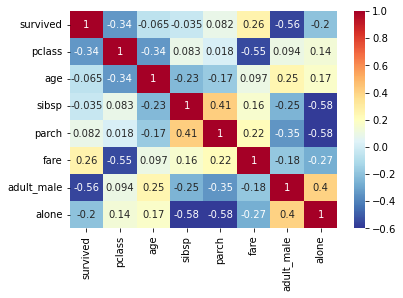

In [24]:
df_heatmap=sns.heatmap(corr,
                       cbar=True,
                       annot=True,
                       cmap='RdYlBu_r',
                       vmin=-0.6,vmax=1)